In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import astropy
from astropy.io import fits
from astropy.table import Table
from astropy.cosmology import WMAP9 as cosmo
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.gridspec import GridSpec
import linmix

import mplpresets
import plotfunctions

In [10]:
fullcleardf = pd.read_csv('data/fullcleardf.csv')
sortedclearmergedf = pd.read_csv('data/sortedclearmergedf.csv')
barrodf =  pd.read_csv('data/barrodf.csv')
barromiddf =  pd.read_csv('data/barromiddf.csv')

limitdf = pd.read_csv('data/limitdf.csv')
limitbetanegdf = pd.read_csv('data/limitbetanegdf.csv')
limitpabdcdf = pd.read_csv('data/limitpabdcdf_avcor_csv.csv')
dclimitdf = pd.read_csv('data/dclimitdf.csv')
dclimitbetanegdf = pd.read_csv('data/dclimitbetanegdf.csv')


sortedpabdf = pd.read_csv('data/sortedpabdf.csv')
fullmergedf = pd.read_csv('data/fullmergePAB.csv')
fullmergebaddf = pd.read_csv('data/fullmergebadPAB.csv')
samplepabdcdf = pd.read_csv('data/samplepabdcdf_avcor.csv')

dustdf = pd.read_csv('data/dustdfPAB.csv')
dustcurvesdf = pd.read_csv('data/dustcurvesdf.csv')
attdf = pd.read_csv('data/attdfPAB.csv')

dcmergedf = pd.read_csv('data/dcmergePAB.csv')
dcsampledf = pd.read_csv('data/dcsampledf.csv')
morphdf = pd.read_csv('data/morphdf.csv')
dcmorphdf = pd.read_csv('data/dcmorphdf.csv')

fullmergedfsnr3 = pd.read_csv('data/fullmergedfsnr3.csv')
fullmergedfsnr3s = pd.read_csv('data/fullmergedfsnr3s.csv')
dcmergedfsnr3 = pd.read_csv('data/dcmergedfsnr3.csv')
dcmergedfsnr3s = pd.read_csv('data/dcmergedfsnr3s.csv')
dcsampledfsnr3 = pd.read_csv('data/dcsampledfsnr3.csv')
dcsampledfsnr3s = pd.read_csv('data/dcsampledfsnr3s.csv')
morphdfsnr3 = pd.read_csv('data/morphdfsnr3.csv')
morphdfsnr3s = pd.read_csv('data/morphdfsnr3s.csv')
dcmorphdfsnr3 = pd.read_csv('data/dcmorphdfsnr3.csv')
dcmorphdfsnr3s = pd.read_csv('data/dcmorphdfsnr3s.csv')

In [3]:
barromassdf = barrodf.query('td_lmass > 7.25')
barromidmassdf = barromiddf.query('td_lmass > 7.25')
fullmergedf['SFR1'] = fullmergedf['ir_SFR-UV_corr']
fullmergedf['SFR2'] = fullmergedf['ir_SFR-IR']
tfullmergedf =  fullmergedf.query('SFR2 > 0')
barromassdf['SFR1'] = barromassdf['ir_SFR-UV_corr']
barromassdf['SFR2'] = barromassdf['ir_SFR-IR']
tbarroirmassdf =  barromassdf.query('SFR2 > 0')
barromidmassdf['SFR1'] = barromidmassdf['ir_SFR-UV_corr']
barromidmassdf['SFR2'] = barromidmassdf['ir_SFR-IR']
tbarromidmassdf =  barromidmassdf.query('SFR2 > 0')

In [4]:
fullmergedf['IMAGE_PATH']=np.zeros(len(fullmergedf))
for i in range(len(fullmergedf)):
    fullmergedf['IMAGE_PATH'][i] = 'Cleri_PaB_sample/RGB_iYH_'.__add__(str(fullmergedf['FIELD'][i][:2]).__add__(str(fullmergedf['ID'][i]).__add__('.png')))

In [5]:
fullmergedf['IMAGE_MASS_BINS'] = pd.cut(fullmergedf['td_lmass'], bins=[7,7.5,8,8.5,9,9.5,10,10.5], labels=[7.25,7.75,8.25,8.75,9.25,9.75,10.25])
fullmergedf['IMAGE_MASS_BINS_LABEL'] = np.zeros(len(fullmergedf['IMAGE_MASS_BINS']))
from collections import Counter
fullmergedf['IMAGE_MASS_BINS_LABEL'] = np.zeros(len(fullmergedf['IMAGE_MASS_BINS']))
for i in range(len(fullmergedf['IMAGE_MASS_BINS'])):
    for massbin in fullmergedf['IMAGE_MASS_BINS'].unique():
        if fullmergedf['IMAGE_MASS_BINS'][i]==massbin:
            fullmergedf['IMAGE_MASS_BINS_LABEL'][i]=Counter(fullmergedf['IMAGE_MASS_BINS'][:i])[massbin]
            
fullmergedf['IMAGE_MASS_BINS_2'] = pd.cut(fullmergedf['td_lmass'], bins=[7,7.4,7.8,8.2,8.6,9,9.4,9.8,10.2], labels=[7.2,7.6,8.0,8.4,8.8,9.2,9.6,10.0])
fullmergedf['IMAGE_MASS_BINS_LABEL_2'] = np.zeros(len(fullmergedf['IMAGE_MASS_BINS_2']))
for i in range(len(fullmergedf['IMAGE_MASS_BINS_2'])):
    for massbin in fullmergedf['IMAGE_MASS_BINS_2'].unique():
        if fullmergedf['IMAGE_MASS_BINS_2'][i]==massbin:
            fullmergedf['IMAGE_MASS_BINS_LABEL_2'][i]=Counter(fullmergedf['IMAGE_MASS_BINS_2'][:i])[massbin]

(7.4, 10.2, 0.4, 10.6)

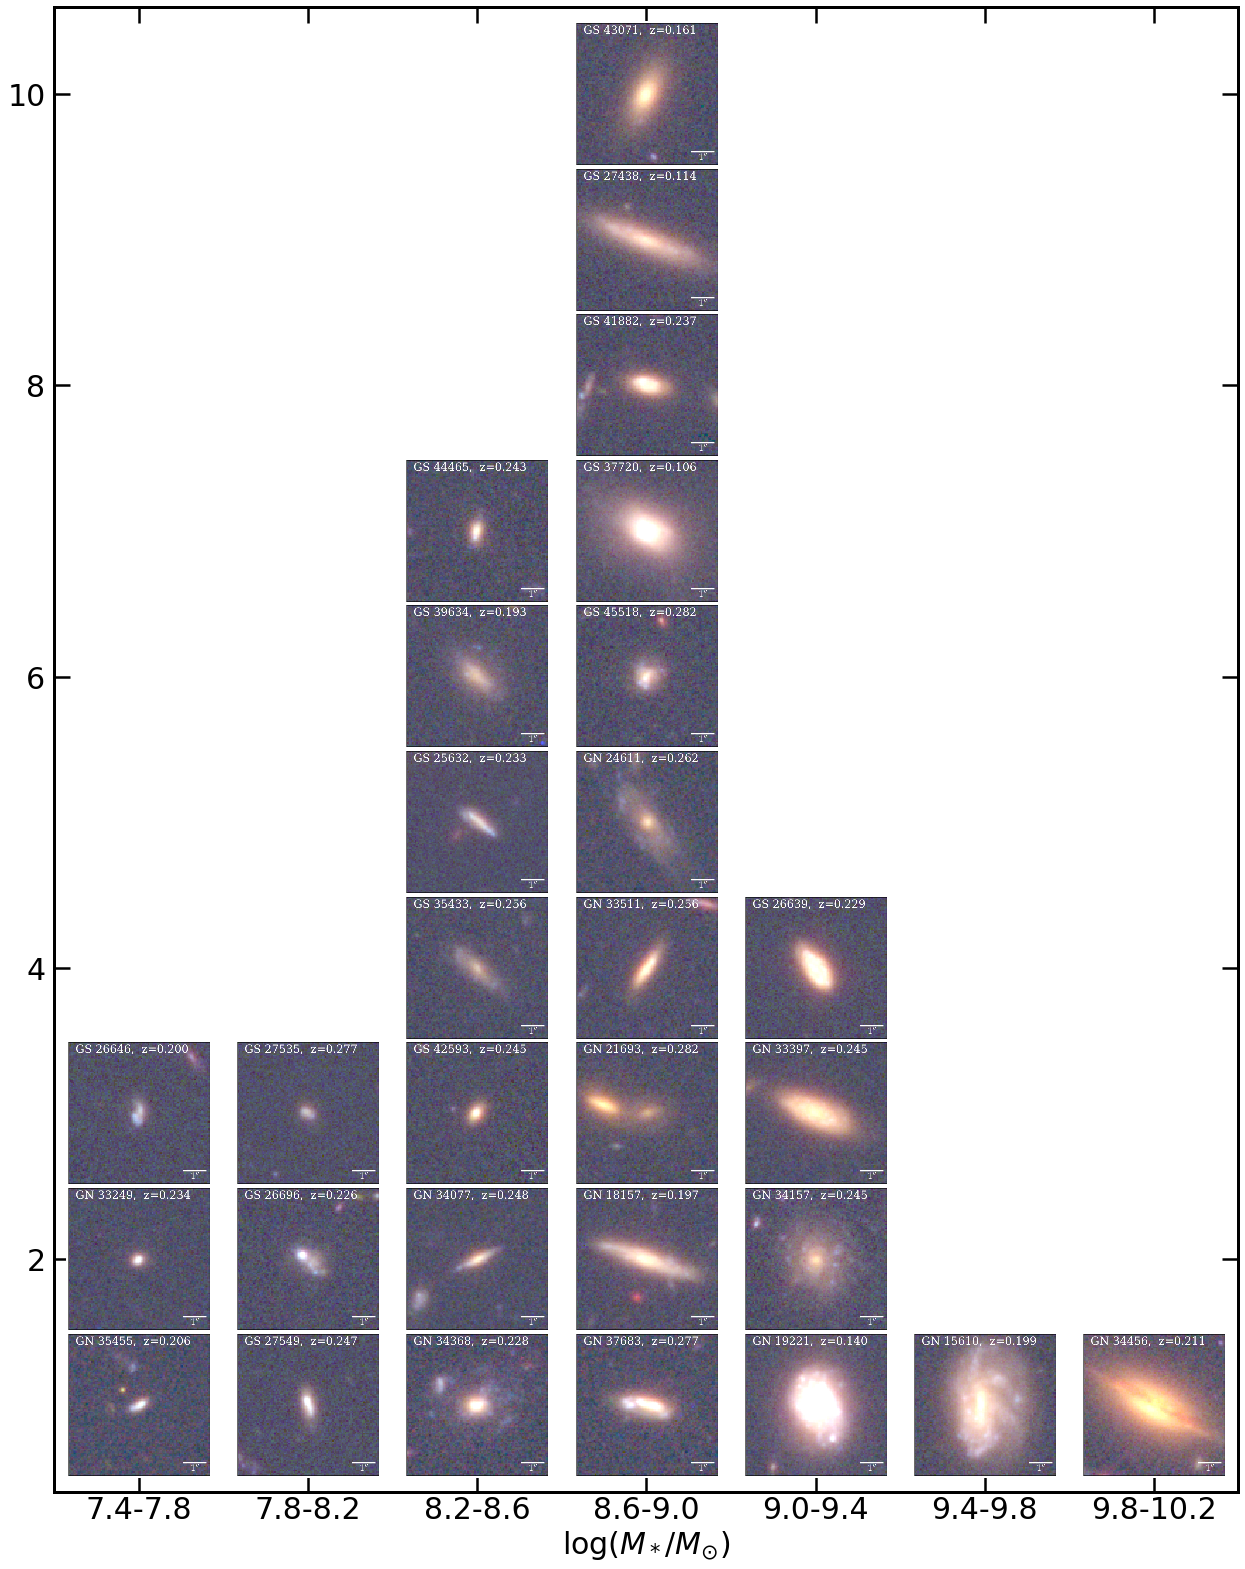

In [8]:
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=0.25)

paths = fullmergedf['IMAGE_PATH']
y = fullmergedf['IMAGE_MASS_BINS_LABEL_2']+1
x = fullmergedf['IMAGE_MASS_BINS_2']

fig, ax = plt.subplots(figsize=(18,22.5), tight_layout=True)
ax.scatter(x, y) 
ax.set_xlabel('log$(M_*/M_{\odot})$')
# ax.set_ylabel('log$(M_*/M_{\odot})$')
for x0, y0, path in zip(x, y, paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)
# ax.axis('off')
ax.set_xticks([7.2,7.6,8.0,8.4,8.8,9.2,9.6,10.0])
ax.set_xticklabels(['7.0-7.4' , '7.4-7.8' , '7.8-8.2' , '8.2-8.6' , '8.6-9.0' , '9.0-9.4' , '9.4-9.8' , '9.8-10.2'])
ax.minorticks_off()
ax.axis([7.4,10.2,.4,10.6])